/home/evgeny/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(0.0001, 10.0)

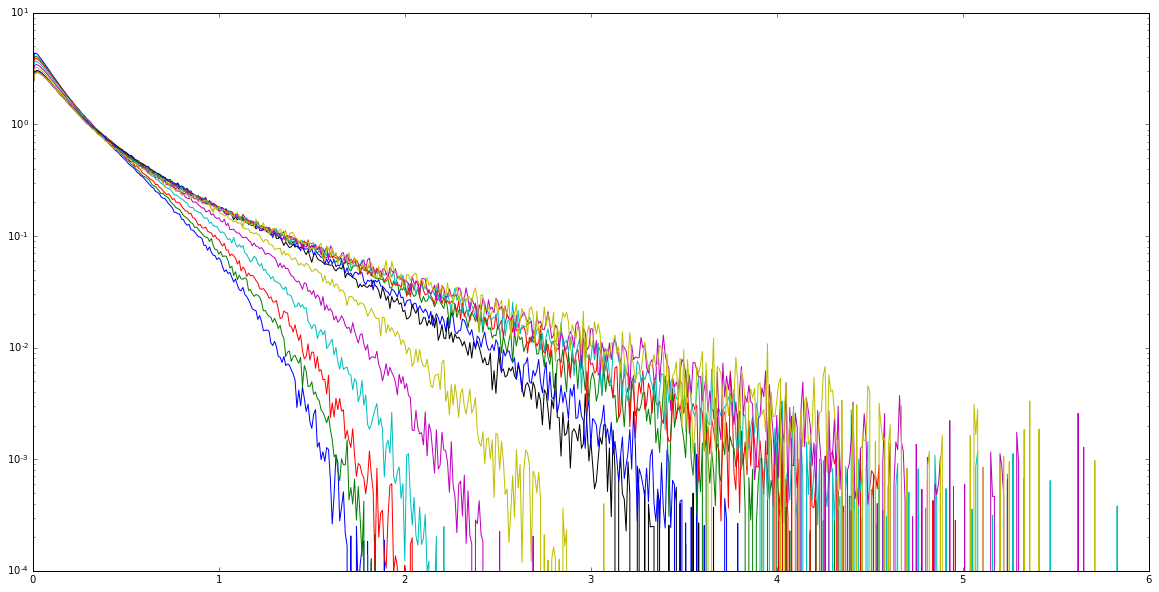

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import math
import utils

def read_file(filename, energy):
    f = open(filename, 'r')
    axis = []
    spectra = []
    ratio = 0
    for line in f:
        tmp = line.split()
        axis.append(float(tmp[0]))
        spectra.append(float(tmp[1]))
    summ = sum(spectra)*(axis[1]-axis[0])
    de = axis[1]-axis[0]
    summ1 = 0
    for i in range(len(spectra)):
        summ1 += spectra[i]/(i+0.425)
#    print 'Summ1 ', summ1
    for i in range(len(spectra)):
        spectra[i] /= summ
    summ = sum(spectra)*(axis[1]-axis[0])
    for i in range(len(spectra)):
        if (axis[1]-axis[0])*i > energy:
            ratio += spectra[i]*(axis[1]-axis[0])
#    print summ
    return axis, spectra,ratio

inpath = '/media/evgeny/D444EFAC44EF9012/test_QP_QED/'
pathlist = ['spectra_new_8', 'spectra_new_9', 'spectra_new_10', 'spectra_new_12', 'spectra_new_15', 'spectra_new_20',
        'spectra_new_30', 'spectra_new_35', 'spectra_new_50', 'spectra_new_60',
        'spectra_new_70', 'spectra_new_90', 'spectra_new_100']
axis = []
spectra = []
power = []
ratio = []
ticks = []
ticklabels = []
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,1,1)
for path_ in pathlist:
    path = inpath + path_
    pwr = int(path_.strip('/').split('_')[2])
    axis_,spectra_, ratio_ = read_file(path + '/sp_sphere_%d.dat'%(pwr), 1.)
    a, = ax1.plot(axis_, spectra_, label = pwr);
    ticks.append(pwr)
    ticklabels.append(str(pwr))
    ratio.append(ratio_)
    power.append(pwr)
ax1.set_yscale('log')
ax1.set_xlim([0, 6])
ax1.set_ylim([1e-4, 1e1])



In [4]:
en = []
p = []
fp = open(inpath + '/power_1gev.dat', 'w')
fe = open(inpath + '/energy_1gev.dat', 'w')
for i in xrange(8,100):
    for k in range(1,len(power)):
        if float(i) >= power[k-1] and float(i) < power[k]:
#            print float(i), power[k-1], power[k], (float(i) - power[k-1])/(power[k] - power[k-1]), (power[k] - float(i))/(power[k] - power[k-1])
            en_ = (ratio[k] * (float(i) - power[k-1]) + ratio[k-1] * (power[k] - float(i)))/(power[k] - power[k-1])
            p_ = float(i)
            en.append(en_)
            p.append(p_)
            fp.write('%lf\n'%p_)
            fe.write('%lf\n'%en_)
            break
fp.close()
fe.close()

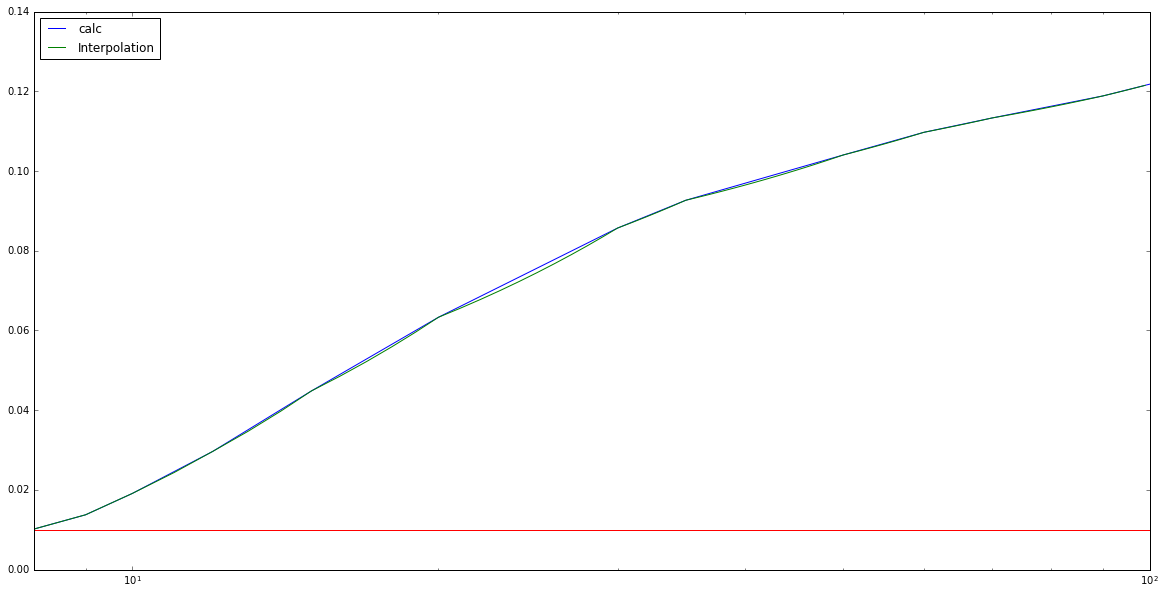

In [5]:
fig = plt.figure(figsize = (20,10))
ax2 = fig.add_subplot(1,1,1)
ax2.plot(power, ratio, label = 'calc')
ax2.plot(p, en, label = 'Interpolation')
ax2.plot([power[0], power[-1]], [0.01, 0.01])

ax2.legend(loc = 'upper left');
ax2.set_xlim([8, 100])
ax2.set_xscale('log')
ax2.set_xticks(ticks);
ax2.set_xticklabels(ticklabels);
